In [1]:
import os
import pandas as pd
import numpy as np
import requests
import json
import glob

os.environ['BEEP_ENV'] = 'dev'

In [2]:
from beep import validate, structure, featurize

In [3]:
from matplotlib import pyplot as plt
from monty.serialization import loadfn

In [4]:
data_dir = 'DeltaQFastCharge' # Directory for DeltaQFastCharge
data_dir2 = 'TrajectoryFastCharge' # Directory for TrajectoryFastCharge

In [5]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if ".json" in fullPath:
            allFiles.append(fullPath)
    return allFiles

In [6]:
def convert_to_float(lst):
    if type(lst) != int:
        return lst[0]
    else:
        return lst

Getting Features

In [7]:
file_list = getListOfFiles(data_dir)
print(len(file_list))
file_list[:5]

139


['DeltaQFastCharge\\FastCharge_000000_CH19_features_DeltaQFastCharge.json',
 'DeltaQFastCharge\\FastCharge_000001_CH16_features_DeltaQFastCharge.json',
 'DeltaQFastCharge\\FastCharge_000001_CH30_features_DeltaQFastCharge.json',
 'DeltaQFastCharge\\FastCharge_000001_CH38_features_DeltaQFastCharge.json',
 'DeltaQFastCharge\\FastCharge_000002_CH10_features_DeltaQFastCharge.json']

In [8]:
df = pd.DataFrame()
for file in file_list:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        df = pd.concat([df,data_df])
df.reset_index(drop=True,inplace=True)

# This line depends on the file.
# In this case, an example name is:
# '/mnt/c/Users/sjrt1/Documents/School/Winter2021/DATA451/FastCharge/data-share/features/DeltaQFastCharge/FastCharge_000000_CH19_features_DeltaQFastCharge.json'
# Which we want to shorten to FastCharge_000000_CH19
df['name'] = df['name'].apply(lambda x: x[103:125])
df.head()

,@module,@class,name,@version,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,...,X.internal_resistance_cycle_2,X.internal_resistance_difference_cycles_2:100,X.nominal_capacity_by_median,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.init_pred_cycle,metadata.parameters.mid_pred_cycle,metadata.parameters.final_pred_cycle,metadata.parameters.n_nominal_cycles
0,beep.featurize,DeltaQFastCharge,FastCharge_000000_CH19,2021.1.11.15,[1.0454259],[0.8891461000000003],[1.0331815],[231072.4263671875],[614.4000244140625],[-1.1444158302992298],...,[0.017864122986793518],[-0.0010415539145469666],[1.047977],el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,10,91,100,40
1,beep.featurize,DeltaQFastCharge,FastCharge_000001_CH16,2021.1.11.15,[1.0620247999999999],[0.48970650000000004],[1.0439155],[149767.85131961218],[563.2000122070312],[-1.2773591296554208],...,[0.013516996055841446],[0.0003414759412407875],[1.06011365],el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,10,91,100,40
2,beep.featurize,DeltaQFastCharge,FastCharge_000001_CH30,2021.1.11.15,[1.0678786],[0.4961450999999999],[1.054091],[205315.4877278646],[614.4000244140625],[-1.3752393675218624],...,[0.013937968760728836],[0.00024036318063735962],[1.06736225],el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,10,91,100,40
3,beep.featurize,DeltaQFastCharge,FastCharge_000001_CH38,2021.1.11.15,[1.0512739],[0.49011190000000004],[1.0341983000000001],[159799.4890051929],[563.2000122070312],[-1.2430890844325302],...,[0.013172633945941925],[0.00042933784425258636],[1.05098615],el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,10,91,100,40
4,beep.featurize,DeltaQFastCharge,FastCharge_000002_CH10,2021.1.11.15,[1.0665728],[0.47571469999999993],[1.0695093],[146029.5250360061],[614.4000244140625],[-1.640443517452452],...,[0.015434841625392437],[-0.0001586293801665306],[1.0708095],el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,10,91,100,40


Response variable data

In [10]:
file_list2 = getListOfFiles(data_dir2)
file_list2 = file_list2[:len(file_list2)-2]

In [11]:
print(len(file_list2))
file_list2[:5]

137


['TrajectoryFastCharge\\FastCharge_000000_CH19_features_TrajectoryFastCharge.json',
 'TrajectoryFastCharge\\FastCharge_000001_CH16_features_TrajectoryFastCharge.json',
 'TrajectoryFastCharge\\FastCharge_000001_CH30_features_TrajectoryFastCharge.json',
 'TrajectoryFastCharge\\FastCharge_000001_CH38_features_TrajectoryFastCharge.json',
 'TrajectoryFastCharge\\FastCharge_000002_CH10_features_TrajectoryFastCharge.json',
 'TrajectoryFastCharge\\FastCharge_000002_CH18_features_TrajectoryFastCharge.json',
 'TrajectoryFastCharge\\FastCharge_000002_CH2_features_TrajectoryFastCharge.json',
 'TrajectoryFastCharge\\FastCharge_000002_CH34_features_TrajectoryFastCharge.json',
 'TrajectoryFastCharge\\FastCharge_000002_CH42_features_TrajectoryFastCharge.json',
 'TrajectoryFastCharge\\FastCharge_000002_CH47_features_TrajectoryFastCharge.json',
 'TrajectoryFastCharge\\FastCharge_000002_CH7_features_TrajectoryFastCharge.json',
 'TrajectoryFastCharge\\FastCharge_000003_CH39_features_TrajectoryFastCharge.j

In [12]:
df2 = pd.DataFrame()
for file in file_list2:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        df2 = pd.concat([df2,data_df])
df2.reset_index(drop=True,inplace=True)
df2['name'] = df2['name'].apply(lambda x: x[107:129])
df2.head()

,@module,@class,name,@version,X.capacity_0.98,X.capacity_0.95,X.capacity_0.92,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,beep.featurize,TrajectoryFastCharge,FastCharge_000000_CH19,2021.1.11.15,[127],[269],[376],[423],[449],[467],[483],el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,0.98,0.78,0.03
1,beep.featurize,TrajectoryFastCharge,FastCharge_000001_CH16,2021.1.11.15,[125],[276],[426],[528],[613],[668],[668],el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,0.98,0.78,0.03
2,beep.featurize,TrajectoryFastCharge,FastCharge_000001_CH30,2021.1.11.15,[774],[774],[774],[774],[774],[774],[774],el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,0.98,0.78,0.03
3,beep.featurize,TrajectoryFastCharge,FastCharge_000001_CH38,2021.1.11.15,[543],[543],[543],[543],[543],[543],[543],el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,0.98,0.78,0.03
4,beep.featurize,TrajectoryFastCharge,FastCharge_000002_CH10,2021.1.11.15,[1011],[1011],[1011],[1011],[1011],[1011],[1011],el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,0.98,0.78,0.03


In [13]:
# df_full = df.merge(df2,'inner',left_index=True,right_index=True)
df_full = df.merge(df2,'inner',on = 'name')


# Making values not stored as lists
for column in df_full.columns:
    if "X." in column:
        df_full[column] = df_full[column].apply(lambda x: x[0])

df_full

,@module_x,@class_x,name,@version_x,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,...,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode_y,metadata.protocol_y,metadata.channel_id_y,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,beep.featurize,DeltaQFastCharge,FastCharge_000000_CH19,2021.1.11.15,1.045426,0.889146,1.033181,231072.426367,614.400024,-1.144416,...,423,449,467,483,el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,0.98,0.78,0.03
1,beep.featurize,DeltaQFastCharge,FastCharge_000001_CH16,2021.1.11.15,1.062025,0.489707,1.043915,149767.851320,563.200012,-1.277359,...,528,613,668,668,el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,0.98,0.78,0.03
2,beep.featurize,DeltaQFastCharge,FastCharge_000001_CH30,2021.1.11.15,1.067879,0.496145,1.054091,205315.487728,614.400024,-1.375239,...,774,774,774,774,el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,0.98,0.78,0.03
3,beep.featurize,DeltaQFastCharge,FastCharge_000001_CH38,2021.1.11.15,1.051274,0.490112,1.034198,159799.489005,563.200012,-1.243089,...,543,543,543,543,el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,0.98,0.78,0.03
4,beep.featurize,DeltaQFastCharge,FastCharge_000002_CH10,2021.1.11.15,1.066573,0.475715,1.069509,146029.525036,614.400024,-1.640444,...,1011,1011,1011,1011,el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,0.98,0.78,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,beep.featurize,DeltaQFastCharge,FastCharge_000067_CH42,2021.1.11.15,1.078978,0.608866,1.084827,212899.852946,563.200012,-1.278854,...,555,582,608,627,EL150800460642,2017-05-12_TESTS\20170512-7C-40PER_3_6C.SDU,41,0.98,0.78,0.03
133,beep.featurize,DeltaQFastCharge,FastCharge_000068_CH38,2021.1.11.15,1.071237,0.889271,1.081298,228156.019739,588.799988,-1.270681,...,247,454,471,486,el150800460511,2017-06-30_tests\20170630-5_6C_38per_4_25C.sdu,37,0.98,0.78,0.03
134,beep.featurize,DeltaQFastCharge,FastCharge_000069_CH25,2021.1.11.15,1.068216,0.887755,1.076756,233369.177230,588.799988,-1.393213,...,250,483,503,522,el150800460610,2017-06-30_tests\20170630-4_9C_61per_4_5C.sdu,24,0.98,0.78,0.03
135,beep.featurize,DeltaQFastCharge,FastCharge_000070_CH46,2021.1.11.15,1.066163,0.886750,1.073273,231731.725590,640.000000,-1.400177,...,443,462,480,497,el150800460613,2017-06-30_tests\20170630-6C_4per_4_75C.sdu,45,0.98,0.78,0.03


In [15]:
df_full.keys()

Index(['@module_x', '@class_x', 'name', '@version_x',
       'X.discharge_capacity_cycle_2', 'X.max_discharge_capacity_difference',
       'X.discharge_capacity_cycle_100',
       'X.integrated_time_temperature_cycles_1:100',
       'X.charge_time_cycles_1:5',
       'X.abs_min_discharge_capacity_difference_cycles_2:100',
       'X.abs_mean_discharge_capacity_difference_cycles_2:100',
       'X.abs_variance_discharge_capacity_difference_cycles_2:100',
       'X.abs_skew_discharge_capacity_difference_cycles_2:100',
       'X.abs_kurtosis_discharge_capacity_difference_cycles_2:100',
       'X.abs_first_discharge_capacity_difference_cycles_2:100',
       'X.max_temperature_cycles_1:100', 'X.min_temperature_cycles_1:100',
       'X.slope_discharge_capacity_cycle_number_2:100',
       'X.intercept_discharge_capacity_cycle_number_2:100',
       'X.slope_discharge_capacity_cycle_number_91:100',
       'X.intercept_discharge_capacity_cycle_number_91:100',
       'X.min_internal_resistance_cycl

In [16]:
df['X.abs_min_discharge_capacity_difference_cycles_2:100'] = (df['X.abs_min_discharge_capacity_difference_cycles_2:100'].
                                                             apply(lambda x : x[0]))

In [17]:
df['X.abs_kurtosis_discharge_capacity_difference_cycles_2:100'] = (df['X.abs_kurtosis_discharge_capacity_difference_cycles_2:100'].
                                                             apply(lambda x : x[0]))

In [18]:
df['X.slope_discharge_capacity_cycle_number_2:100'] = (df['X.slope_discharge_capacity_cycle_number_2:100'].
                                                             apply(lambda x : x[0]))

In [19]:
df['X.intercept_discharge_capacity_cycle_number_91:100'] = (df['X.intercept_discharge_capacity_cycle_number_91:100'].
                                                           apply(lambda x: x[0]))

In [20]:
df['X.discharge_capacity_cycle_2'] = (df['X.discharge_capacity_cycle_2'].
                                     apply(lambda x : x[0]))

In [21]:
df['X.charge_time_cycles_1:5'] = (df['X.charge_time_cycles_1:5'].
                                 apply(lambda x : x[0]))

In [22]:
df['X.integrated_time_temperature_cycles_1:100'] = (df['X.integrated_time_temperature_cycles_1:100'].
                                                   apply(lambda x : x[0]))

In [23]:
df['X.min_internal_resistance_cycles_2:100'] = (df['X.min_internal_resistance_cycles_2:100'].
                                               apply(lambda x : x[0]))

In [24]:
df['X.internal_resistance_difference_cycles_2:100'] = (df['X.internal_resistance_difference_cycles_2:100'].
                                                      apply(lambda x : x[0]))

Model Recreation

In [25]:
"""
variance_model_features = 'X.abs_variance_discharge_capacity_difference_cycles_2:100'
discharge_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                            'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                            'X.abs_skew_discharge_capacity_difference_cycles_2:100',
                            'X.abs_kurtosis_discharge_capacity_difference_cycles_2:100',
                            'X.discharge_capacity_cycle_2',
                            'X.max_discharge_capacity_difference'
                            ]
"""                        
full_model_features = ['X.abs_min_discharge_capacity_difference_cycles_2:100',
                       'X.abs_variance_discharge_capacity_difference_cycles_2:100',
                       'X.slope_discharge_capacity_cycle_number_2:100',
                       'X.intercept_discharge_capacity_cycle_number_2:100',
                       'X.discharge_capacity_cycle_2',
                       'X.charge_time_cycles_1:5',
                       'X.integrated_time_temperature_cycles_1:100',
                       'X.min_internal_resistance_cycles_2:100',
                       'X.internal_resistance_difference_cycles_2:100']
y = df_full['X.capacity_0.8']

Variance Model

In [26]:
from sklearn.linear_model import LinearRegression

<AxesSubplot:xlabel='X.abs_variance_discharge_capacity_difference_cycles_2:100', ylabel='X.capacity_0.8'>

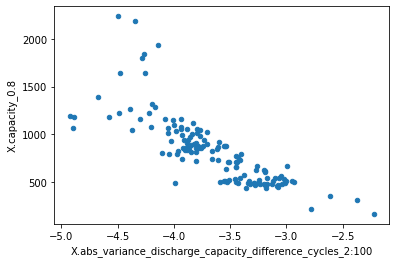

In [27]:
df_full.plot.scatter(x='X.abs_variance_discharge_capacity_difference_cycles_2:100', y = 'X.capacity_0.8')

In [28]:
X = df_full[full_model_features].values

In [29]:
reg = LinearRegression().fit(X,y)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg.predict(X)
print("Training MSE: ", mean_squared_error(y, y_pred))
print("R2 :", r2_score(y, y_pred))


Training MSE:  26980.188498530708
R2 : 0.792005867859698
